In [13]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

#Locating Data
import os 

MJ_Stats_Path = os.path.join("Resources", "MJ-Stats.csv")
Shaq_Stats_Path = os.path.join("Resources", "Shaq-Stats.csv")

#Reading Data
MJ_Stats = pd.read_csv(MJ_Stats_Path)
Shaq_Stats = pd.read_csv(Shaq_Stats_Path)

#Merge Data
data_df = pd.concat([MJ_Stats, Shaq_Stats])

#Print Stats
print(data_df.head())
print(data_df.shape)

  Player  Game        Date        Age Team  Home Opposition  Win  Difference  \
0     MJ     1  10/26/1984  21.689938  CHI     1        WSB    1          16   
1     MJ     2  10/27/1984  21.692676  CHI     0        MIL    0          -2   
2     MJ     3  10/29/1984  21.698152  CHI     1        MIL    1           6   
3     MJ     4  10/30/1984  21.700890  CHI     0        KCK    1           5   
4     MJ     5   11/1/1984  21.706366  CHI     0        DEN    0         -16   

   GS  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  
0   1  ...    1    5    6    7    2    4    5   2   16  12.5  
1   1  ...    3    2    5    5    2    1    3   4   21  19.4  
2   1  ...    2    2    4    5    6    2    3   4   37  32.9  
3   1  ...    2    2    4    5    3    1    6   5   25  14.7  
4   1  ...    3    2    5    5    1    1    2   4   17  13.2  

[5 rows x 30 columns]
(2279, 30)


In [14]:
data_df["Points per Minute"] = data_df["PTS"] / data_df["Minutes Played"]

MJ_df = data_df.loc[data_df["Player"] == "MJ"].copy()

Shaq_df = data_df.loc[data_df["Player"] == "Shaq"].copy()

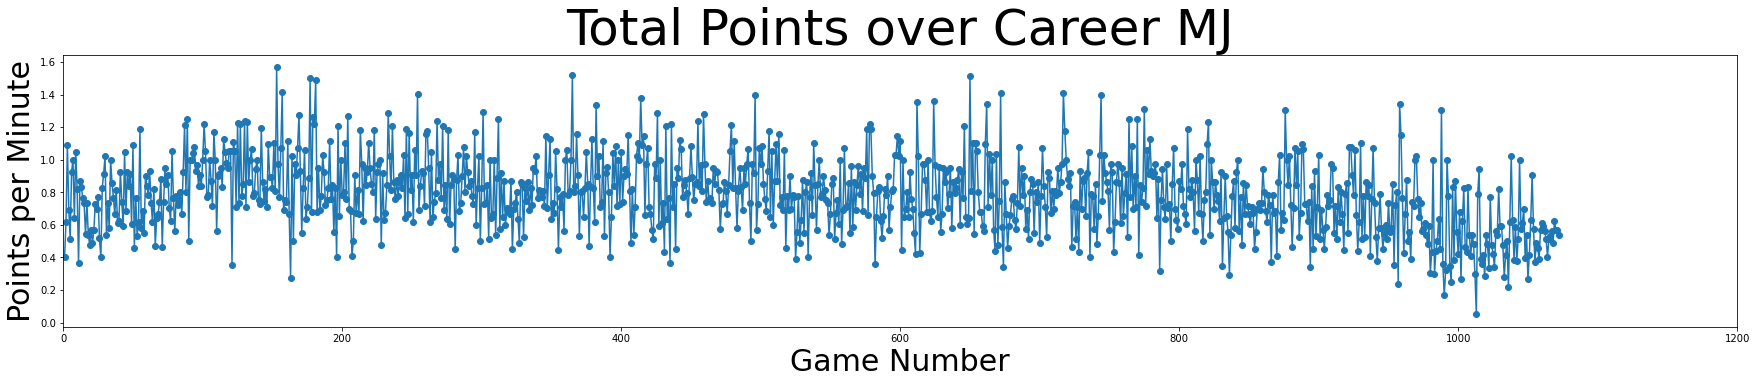

In [67]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)


axes = plt.gca()
axes.xaxis.label.set_size(30)
axes.yaxis.label.set_size(30)

plt.plot(MJ_df['Game'], MJ_df['Points per Minute'], marker = 'o')

plt.xlabel("Game Number")
plt.ylabel("Points per Minute")
plt.title("Total Points over Career MJ", fontsize = 50)

plt.xlim([0,1200])

plt.show()

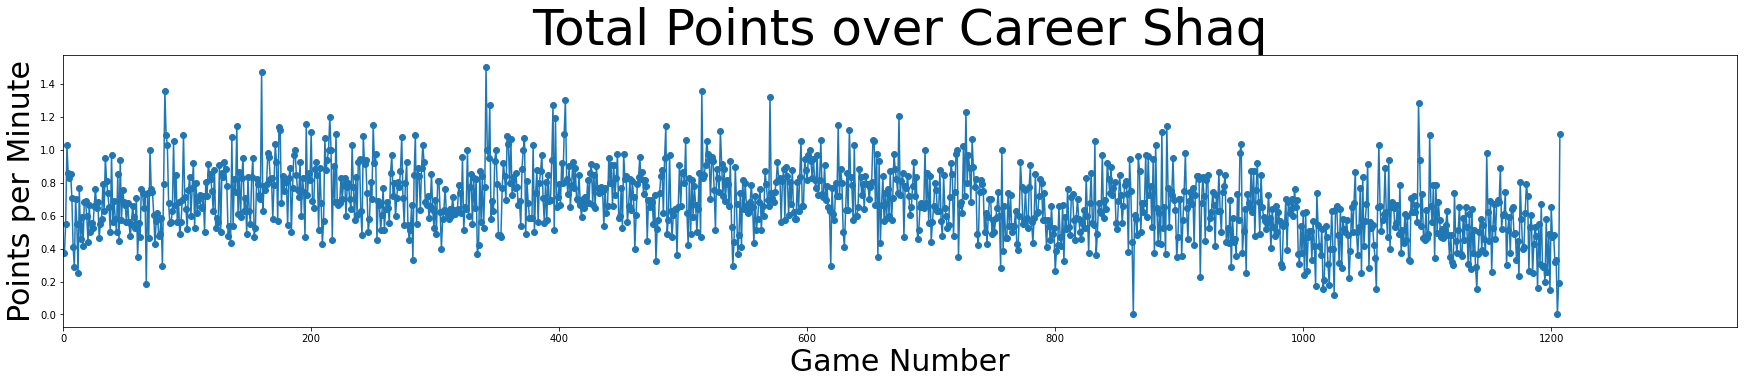

In [72]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)


axes = plt.gca()
axes.xaxis.label.set_size(30)
axes.yaxis.label.set_size(30)

plt.plot(Shaq_df['Game'], Shaq_df['Points per Minute'], marker = 'o')

plt.xlabel("Game Number")
plt.ylabel("Points per Minute")
plt.title("Total Points over Career Shaq", fontsize = 50)

plt.xlim([0,1350])

plt.show()